In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import json

In [2]:
logdir='logs'
logdirs=[d for d in os.listdir() if logdir in d]
#logdirs.sort(key=lambda d: os.path.getmtime(d))
logdirs.sort()
logdir=logdirs[-1]

In [3]:
def getconf(run): 
    with open(os.path.join(logdir,r,'config.json')) as f:
        return json.load(f)

In [4]:
runs_=os.listdir(logdir)

runs=dict()
for r in runs_:
    try:
        runs[r]=getconf(r)['notes']
        print(r,runs[r])
    except:
        print('skipping '+r)
        
runs=dict(sorted(runs.items(),key=lambda a:a[1]))

runs={k:v for k,v in runs.items() if 'mnist' in v}

0819-145123 ProxSR mnist lr=0.5
0819-151944 adam mnist lr=0.01
0819-151759 ProxSR mnist lr=0.05
0819-144645 ProxSR mnist lr=0.1
skipping sr.tar


In [5]:
def getcolor(r):
    if 'ProxSR' in r:
        return 'm'
    if 'adam' in r:
        return 'g'
    if 'sgd' in r:
        return 'r'
    if 'kfac' in r:
        return 'b'
    return 'k'

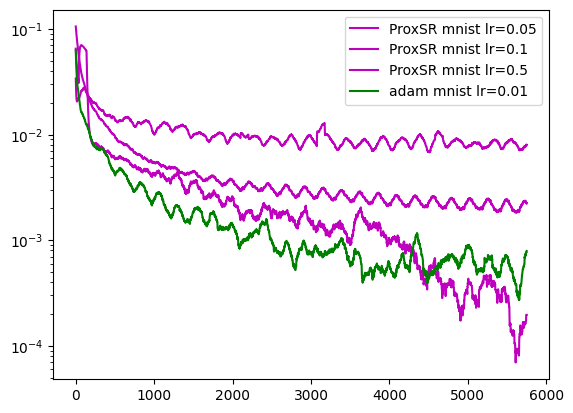

In [6]:
def smooth(y,k=10):
    s=np.ones((k,))/k
    return np.convolve(y,s,mode='valid')

def getenergies(run):
    with open(os.path.join(logdir,run,'loss.txt'),'r') as f:
        return np.array([float(l) for l in f])
    
colors=['r','g','b','m','y','c','orange','brown']*2
alphas=[1]*10
linestyles=['-']*10

for (r,n),c,ls,a in zip(runs.items(),colors,linestyles,alphas):
    try:
        plt.plot(smooth(getenergies(r),k=100),label=n,color=getcolor(n),ls=ls,alpha=a)
    except Exception as e:
        print(e)
        print('skip',r,n)
    
plt.yscale('log')
plt.legend()